since this is purely for visualization, can take some liberties

In [1]:
import numpy as np

Nmesh = 128
snapno = 4

_fname = '/scratch/users/delon/LIMxCMBL/summary_plot/positions_snapno_%d.npy'%(snapno)
parts = np.load(_fname)


_fname = '/scratch/users/delon/LIMxCMBL/summary_plot/snapno_%d_matter_Nmesh_%d_cutout_value.npy'%(snapno, Nmesh)
df = np.load(_fname)

In [2]:
import sys
import matplotlib.pyplot as plt

import pyccl as ccl
from LIMxCMBL.init import *
import h5py
import hdf5plugin
import types
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D, art3d  # NOQA

In [3]:
import seaborn as sns

In [4]:
from matplotlib.colors import Normalize

In [5]:
x, y, z = np.indices((Nmesh, Nmesh, Nmesh))

_x = x.flatten()
_y = y.flatten()
_z = z.flatten()

_center = Nmesh / 2
perp_length = int(Nmesh // 1.618 / 2)

_min = _center - perp_length
_max = _center + perp_length + 1

filled = ((_x >=  _center - perp_length) 
          & (_x <=  _center + perp_length)
          & (_z >=  _center - perp_length)
          & (_z <=  _center + perp_length))
idxs = np.where(filled)


def _plot(colors, std=0.25, sz=0.25, nstd=6):

    fig = plt.figure(dpi=800, facecolor='w')
    ax = fig.add_subplot(projection='3d', computed_zorder=False)



    for i in range(1,nstd):
        __x = (_x + np.random.normal(scale = std/2, size = Nmesh**3))
        __y = (_y + np.random.normal(scale = std/2, size = Nmesh**3))
        __z = (_z + np.random.normal(scale = std/2, size = Nmesh**3))

        ax.scatter(__x[idxs],
                   __y[idxs],
                   __z[idxs], c = colors.reshape(Nmesh**3, 4)[idxs],
                   s=sz*i, lw=0, depthshade=False)


    
    ax.set_xlim([_min, _max])
    ax.set_zlim([_min, _max])
    ax.set_ylim([0, Nmesh])

    edges_kw = dict(color='k', linewidth=3, zorder=10, solid_capstyle='round')
    #external
    ax.plot([_min, _max], [0, 0], _min, **edges_kw)
    ax.plot([_max,_max], [0, Nmesh], _min, **edges_kw)
    ax.plot([_min, _min], [0, 0], [_min, _max], **edges_kw)
    ax.plot([_min, _max], [Nmesh, Nmesh], _max, **edges_kw)
    ax.plot([_min, _min], [0, Nmesh],[_max, _max], **edges_kw)
    ax.plot([_max, _max], [Nmesh, Nmesh], [_min, _max], **edges_kw)


    edges_kw = dict(color='k', linewidth=1, zorder=10)
    #faceing us
    ax.plot([_max, _max], [0, Nmesh],[_max, _max], **edges_kw)
    ax.plot([_min, _max], [0, 0], _max, **edges_kw)
    ax.plot([_max, _max], [0, 0], [_min, _max], **edges_kw)

    edges_kw = dict(color='k', linewidth=0.5, zorder=10)
    #internal
    ax.plot([_min, _min], [0, Nmesh],[_min, _min], **edges_kw)
    ax.plot([_min, _max], [Nmesh, Nmesh], _min, **edges_kw)
    ax.plot([_min, _min], [Nmesh, Nmesh], [_min, _max], **edges_kw)


    ax.axis('off')
    #ax.set_xticks([])
    #ax.set_yticks([])
    #ax.set_zticks([])

    # ax.set_proj_type('persp', focal_length=0.3)


    xlim = ax.get_xlim3d()
    ylim = ax.get_ylim3d()
    zlim = ax.get_zlim3d()
    ax.set_box_aspect((xlim[1]-xlim[0], ylim[1]-ylim[0], zlim[1]-zlim[0]))

    ax.view_init(elev=25, azim=-40, roll=0)
    return fig,ax

In [6]:
#https://matplotlib.org/stable/gallery/mplot3d/imshow3d.html#sphx-glr-gallery-mplot3d-imshow3d-py
def imshow3d(ax, array, pos=0, cmap=None, zorder=2):
    """
    Display a 2D array as a  color-coded 2D image embedded in 3d.

    The image will be in a plane perpendicular to the coordinate axis *value_direction*.

    Parameters
    ----------
    ax : Axes3D
        The 3D Axes to plot into.
    array : 2D numpy array
        The image values.
    value_direction : {'x', 'y', 'z'}
        The axis normal to the image plane.
    pos : float
        The numeric value on the *value_direction* axis at which the image plane is
        located.
    norm : `~matplotlib.colors.Normalize`, default: Normalize
        The normalization method used to scale scalar data. See `imshow()`.
    cmap : str or `~matplotlib.colors.Colormap`, default: :rc:`image.cmap`
        The Colormap instance or registered colormap name used to map scalar data
        to colors.
    """
    colors = cmap(array)

    nx, nz = array.shape
    xi, zi = (np.mgrid[0:nx, 0:nz]/nx * (_max-_min) + _min)
    yi = np.full_like(zi, pos)
    
    ax.plot_surface(xi, yi, zi, rstride=1, cstride=1, facecolors=colors, shade=False, zorder=zorder)


In [7]:
import matplotlib.patheffects as path_effects
# glow = [path_effects.withStroke(linewidth=5, foreground="lightblue", alpha=0.7)]
glow = []

In [8]:
from matplotlib.colors import ListedColormap
import numpy as np
colombi1_cmap = ListedColormap(np.loadtxt("/oak/stanford/orgs/kipac/users/delon/_ARCHIVE/LensQuEst/dev/Planck_Parchment_RGB.txt")/255.)
colombi1_cmap.set_bad("gray")
colombi1_cmap.set_under("white")

In [9]:
colombi1_cmap(1)

(0.0, 0.00784313725490196, 1.0, 1.0)

In [10]:
Dz = np.linspace(0.8, 1, Nmesh)[::-1]
df = df[:,::-1, :]
df *= Dz.reshape(1, -1, 1)

0.8738420643250603 0.0


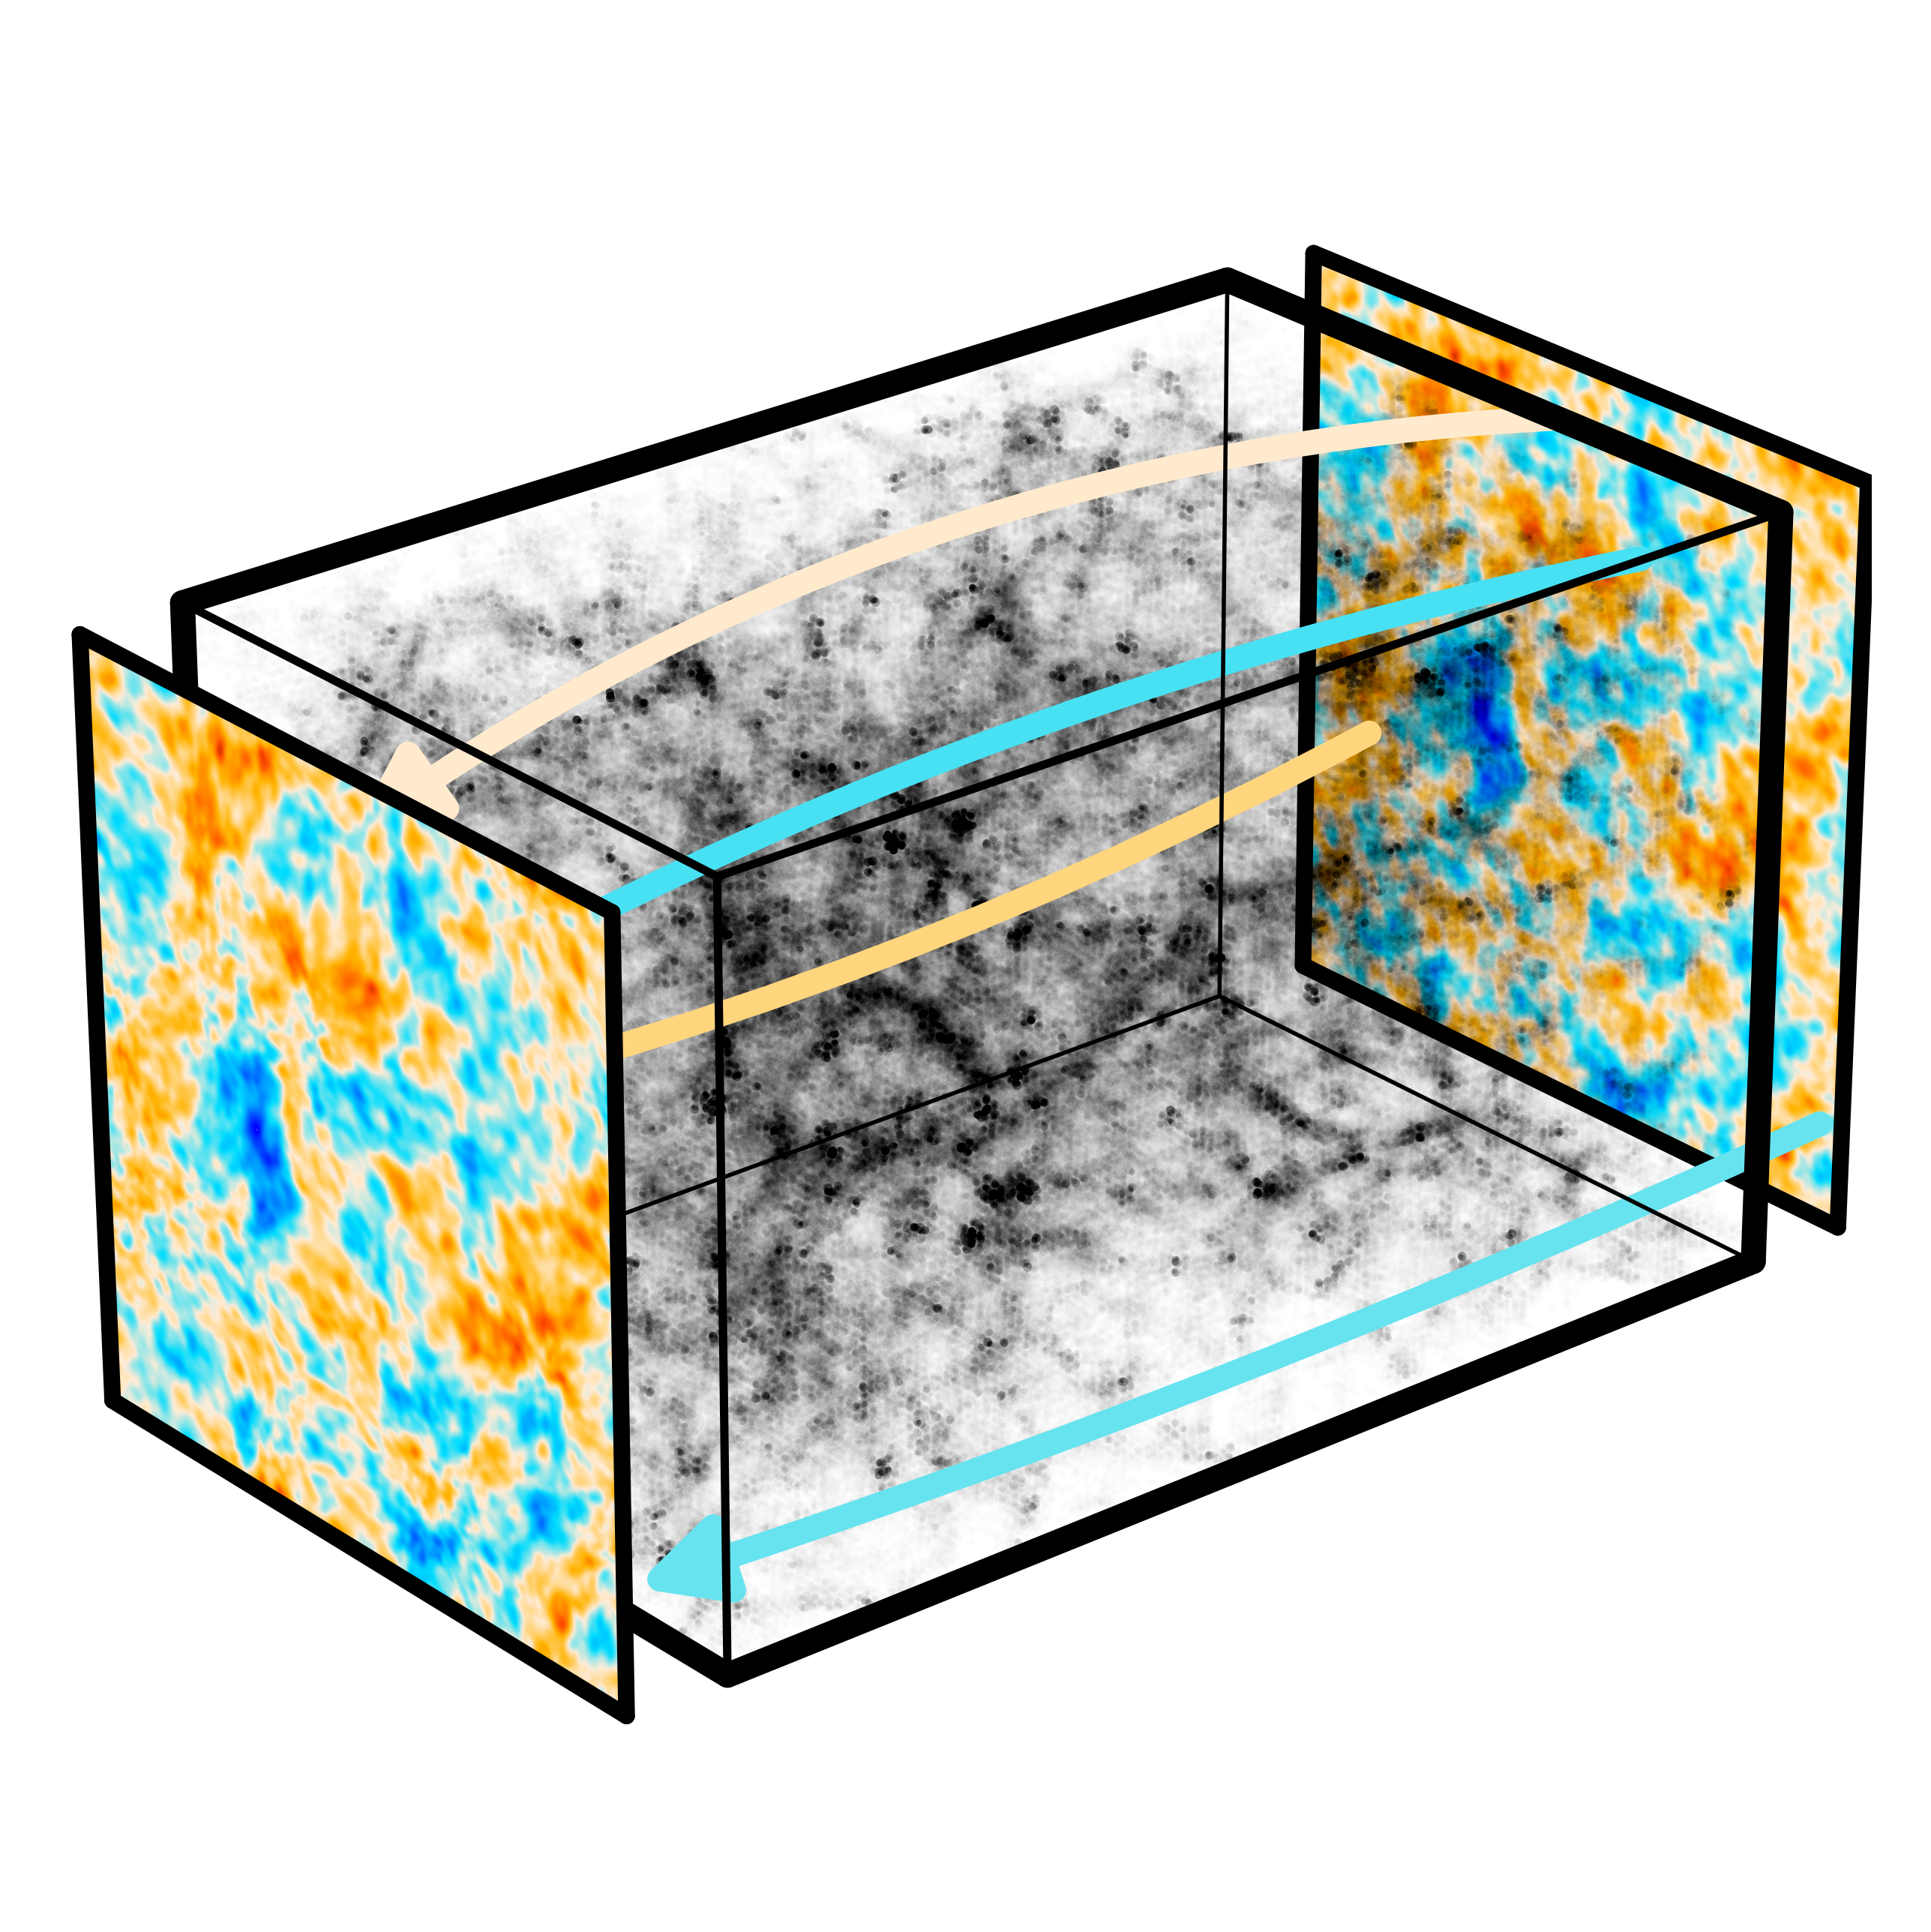

In [11]:
def alpha_transform(alpha):
#     return alpha**1.5
    return alpha

colors = np.zeros((Nmesh,Nmesh,Nmesh,)+ (4,))

denom = (np.max(df)/3)
alph = np.where(df / denom <= 1, df / denom, 1)

colors[...,3] = alpha_transform(alph)

fig, ax = _plot(colors)#, std=0.15, sz=0.15, nstd=6)

pm = 0.09



cmb = np.load('/oak/stanford/orgs/kipac/users/delon/_ARCHIVE/LensQuEst/dev/unlensed_CMB_lim_viz.npy')
lensedCmb = np.load('/oak/stanford/orgs/kipac/users/delon/_ARCHIVE/LensQuEst/dev/exaggerated_lensed_CMB_lim_viz.npy')

vb = np.max(np.abs(cmb))
cmb /= vb
cmb += 1
cmb /= 2

lensedCmb /= vb
lensedCmb += 1
lensedCmb /= 2

print(np.max(cmb), np.min(cmb))

imshow3d(ax, cmb, pos=Nmesh * (1 + pm), cmap=colombi1_cmap, zorder=-1)
imshow3d(ax, lensedCmb, pos=- Nmesh * pm, cmap=colombi1_cmap, zorder=20)


edges_kw = dict(color='k', linewidth=2, zorder=21, solid_capstyle='round')
#external
ax.plot([_min, _max], [-pm*Nmesh, -pm*Nmesh], _min, **edges_kw,)
ax.plot([_min, _max], [-pm*Nmesh, -pm*Nmesh], _max, **edges_kw,)
ax.plot([_min,_min], [-pm*Nmesh, -pm*Nmesh], [_min, _max], **edges_kw,)
ax.plot([_max,_max], [-pm*Nmesh, -pm*Nmesh], [_min, _max], **edges_kw,)


edges_kw = dict(color='k', linewidth=2, zorder=1, solid_capstyle='round')
#external
ax.plot([_min, _max], [(1+pm)*Nmesh, (1+pm)*Nmesh], _min, **edges_kw,)
ax.plot([_min, _max], [(1+pm)*Nmesh, (1+pm)*Nmesh], _max, **edges_kw,)
ax.plot([_min,_min], [(1+pm)*Nmesh, (1+pm)*Nmesh], [_min, _max], **edges_kw,)
ax.plot([_max,_max], [(1+pm)*Nmesh, (1+pm)*Nmesh], [_min, _max], **edges_kw,)



from matplotlib.patches import FancyArrowPatch
style="Simple,tail_width=0.5,head_width=4,head_length=8"
kw = dict(arrowstyle=style)

from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)        
        

arrowlw = 3
##############################
_x = _min + 0.3*perp_length
_z = _min + 0.8*perp_length

acolor = colombi1_cmap(
    cmb[int((_x - _min)/(_max-_min) * len(cmb)),
        int((_z - _min)/(_max-_min) * len(cmb))]
)

a2 = Arrow3D([_x, _min + 0.31*perp_length], 
             [Nmesh*(1 + pm), -Nmesh * pm], 
             [_z, _min + 0.79*perp_length], 
             mutation_scale=20,
             path_effects=glow,
            lw=arrowlw, arrowstyle="-|>", color=acolor, connectionstyle="arc3,rad=-0.08")
ax.add_artist(a2)


##############################
##############################
_x = _min + 2*perp_length
_z = _min + 0.3*perp_length

acolor = colombi1_cmap(
    cmb[int((_x - _min)/(_max-_min) * len(cmb)),
        int((_z - _min)/(_max-_min) * len(cmb))]
)


a2 = Arrow3D([_x, _min + 2*perp_length], 
             [Nmesh*(1 + pm), -Nmesh * pm], 
             [_z, _min + 0.31*perp_length], 
             mutation_scale=20,
             path_effects=glow,
            lw=arrowlw, arrowstyle="-|>", color=acolor, connectionstyle="arc3,rad=-0.03")
ax.add_artist(a2)
##############################
##############################
_x = _min + perp_length
_z = _min + 1.88*perp_length

acolor = colombi1_cmap(
    cmb[int((_x - _min)/(_max-_min) * len(cmb)),
        int((_z - _min)/(_max-_min) * len(cmb))]
)


a2 = Arrow3D([_x, _min + perp_length], 
             [Nmesh*(1 + pm), -Nmesh * pm], 
             [_z, _min + 1.83*perp_length], 
             mutation_scale=20,
             path_effects=glow,
            lw=arrowlw, arrowstyle="-|>", color=acolor, connectionstyle="arc3,rad=0.15")
ax.add_artist(a2)
##############################
##############################
_x = _min + 1.3*perp_length
_z = _min + 1.6*perp_length

acolor = colombi1_cmap(
    cmb[int((_x - _min)/(_max-_min) * len(cmb)),
        int((_z - _min)/(_max-_min) * len(cmb))]
)

a2 = Arrow3D([_x, _min + 1.3*perp_length], 
             [Nmesh*(1 + pm), -Nmesh * pm], 
             [_z, _min + 1.53*perp_length], 
             mutation_scale=20,
             path_effects=glow,
            lw=arrowlw, arrowstyle="-|>", color=acolor, connectionstyle="arc3,rad=0.08")
ax.add_artist(a2)
##############################
        

fig.savefig('figures/016.005.CMB_lensing_viz_Nmesh_%d_snapno_%d.png'%(Nmesh, snapno))#, bbox_inches='tight', pad_inches=0)
fig.savefig('figures/016.005.CMB_lensing_viz_Nmesh_%d_snapno_%d_lowres.png'%(Nmesh, snapno), dpi=200)#, bbox_inches='tight', pad_inches=0)